# Final Project Submission

GROUP 22
- STACY KIRIIRI
- ROSE KYALO
- ANGEL ATUNGIRE
- BRYTONE OMARE

# Insights on Property Investment Profitability

### Overview

In this project, we're diving deep into the King County House Sales dataset to understand what makes properties profitable in King County's real estate market. Our main aim is to provide valuable insights to property investors who want to make smart investment decisions. We'll be looking at various aspects of properties, like their size, number of bedrooms, and condition, to see which factors have the most impact on the sale prices of houses.
By doing this, we hope to help investors optimize their strategies and increase their
chances of getting better returns in the King County real estate market. 

# Business Understanding

### Stakeholder: RASB-berry Property Investors
    
Business Problem: RASB-berry Property investors are looking to optimize their
investment strategies by purchasing properties with the potential for high returns. They
want to know which property attributes, such as square footage, number of bedrooms,
and condition of the property, are most strongly correlated with sale prices.
Objectives
1. Identify Key Predictors of Property Value
- What are the most significant factors that influence property prices in King
County?
- How do location-related variables (e.g., ZIP code, proximity to amenities) impact
property values?

2. Market Trends and Timing

- Can we analyze historical data to identify cyclical patterns in the King County real
estate market?
- When is the best time to buy, hold, or sell properties in different neighborhoods?
- Are there seasonal trends that impact property values, and how can investors
capitalize on them?

## Data understanding and Data preparation

In [1]:
# importing the libraries to be used in the analysis
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#here we load the data to see what it contains
data = pd.read_csv('data/kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
#column names
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# Summary statistic for the dataframe
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Check for missing values
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [8]:
# unique values for the waterfront column
unique_waterfront_values = data['waterfront'].unique()
print(unique_waterfront_values)


[nan 'NO' 'YES']


In [9]:
data["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [10]:
#unique values for view column
unique_view_values = data['view'].unique()
print(unique_view_values)

['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [11]:
data["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
#unique values for yr_renovated column
unique_yr_renovated_values = data['yr_renovated'].unique()
print(unique_yr_renovated_values)

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [13]:
data["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
#calculating the percentage of the missing null values
data['waterfront'].isnull().mean()

0.11001527989998611

In [15]:
data['yr_renovated'].isnull().mean()

0.17789507802009538

In [16]:
data['view'].isnull().mean()

0.0029170718155299346

Through our analysis we decided to drop rows with missing values as the number of missing values was not significant to affect the analysis outcome 

In [17]:
# Drop rows with missing values
data.dropna(inplace=True)

In [18]:
#check if all the rows with missing values were droped 
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
# Check for duplicate rows in the entire DataFrame
duplicates = data.duplicated().sum ()
duplicates

0

## Data type conversion

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

We decided to convert the below columns to datetime values 

In [21]:
data['yr_built']= pd.to_datetime(data['yr_built'])

In [22]:
data['yr_renovated']= pd.to_datetime(data['yr_renovated'])

In [23]:
data['date']= pd.to_datetime(data['date'])

In [24]:
#cheking if the columns were coverted to datatime
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15762 non-null  object        
 14  yr_built       15762 non-null  datetime64[ns]
 15  yr_renovated   1576

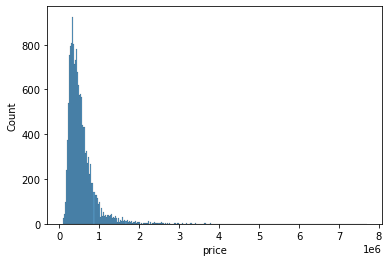

In [25]:
# check for outliers on the price column
sns.histplot(x=data['price'])
plt.show()


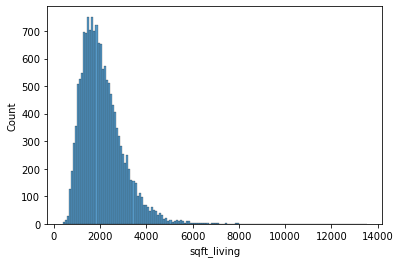

In [26]:
#check for outliers on the sqft_living column
sns.histplot(x=data['sqft_living'])
plt.show()


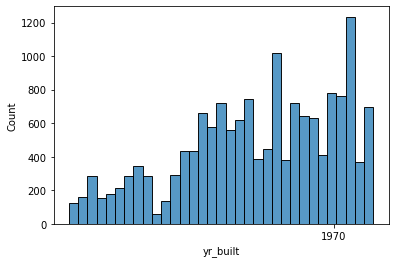

In [27]:
#check for outliers on the yr_built column
sns.histplot(x=data['yr_built'])
plt.show()

Converting the view, condition and grade columns into numerical representations using one hot encoding

In [28]:
# # List of categorical columns to be one-hot encoded
# categorical_columns = ['view', 'condition', 'grade']

# # Perform one-hot encoding for each categorical column
# data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

# # Drop the original categorical columns if needed
# # data_encoded.drop(columns=categorical_columns, inplace=True)


### Simple Linear Regression

In [29]:
# look at correlations between the other variables and price
data.corr()["price"]

id              -0.015183
price            1.000000
bedrooms         0.305489
bathrooms        0.526155
sqft_living      0.706189
sqft_lot         0.084504
floors           0.259505
sqft_above       0.612014
zipcode         -0.049502
lat              0.306607
long             0.021215
sqft_living15    0.581572
sqft_lot15       0.079402
Name: price, dtype: float64

#### What are the most significant factors that influence property prices in King County?

In [30]:
# Select the independent variable and dependent variable
X = data[['sqft_living']]  # Feature (square footage of living area)
y = data['price']           # Target (property price)

In [31]:
# Add a constant (intercept) term to the independent variable
model = sm.OLS(y, sm.add_constant(X))
model

In [32]:
# fit the model
results = model.fit()
results

In [33]:
# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:28:25   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.516e+04   5205.744    -10.597      

#### Simple Linear Regression Results

Looking at the summary above, we can see that the regression line we found was

price = -5.516e+04 + 286.1494sqft_living
 
The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 49.9% of the variance in price

The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05

#### Simple Linear Regression Visualization

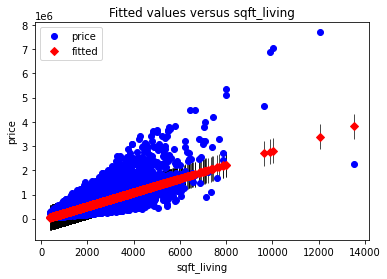

In [34]:
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

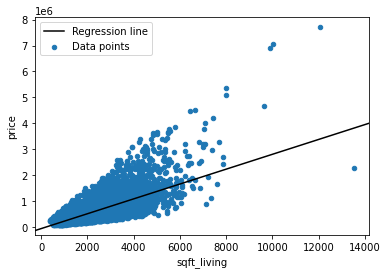

In [35]:
# the regression line
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results = results, label="Regression line", ax=ax, color="black")
ax.legend();

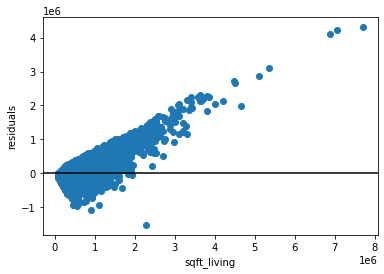

In [36]:
# the residuals
fig, ax = plt.subplots()

ax.scatter(data["price"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### Multiple Linear Regression

In [37]:
# adding another independent variable
X_second = data[["sqft_living", "bathrooms", "bedrooms"]]
X_second

,sqft_living,bathrooms,bedrooms
1,2570,2.25,3
3,1960,3.00,4
4,1680,2.00,3
5,5420,4.50,4
6,1715,2.25,3
...,...,...,...
21591,1310,2.50,3
21592,1530,2.50,3
21593,2310,2.50,4
21594,1020,0.75,2


In [38]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5545.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:28:27   Log-Likelihood:            -2.1887e+05
No. Observations:               15762   AIC:                         4.377e+05
Df Residuals:                   15758   BIC:                         4.378e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.86e+04   8155.577      8.411      

#### Model with Three Features Results

This time, the model we built was:

price = 6.86e+04 + 316.9197sqft_living + 6491.4498bathrooms -5.968e+04bedrooms
 
The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 51% of the variance in price which is a bit higher than the baseline model

The model coefficients (const, sqft_living, bedrooms) are both statistically significant, with t-statistic p-values well below 0.05 while coefficient (bathrooms) is above the significance value of 0.05

There is a slight increase than we saw with the baseline model, the adjusted r-squared value has increased. This means that bathrooms and bedrooms was meaningfully confounding in the relationship between sqft_living and price

#### Model with Three Features Visualization

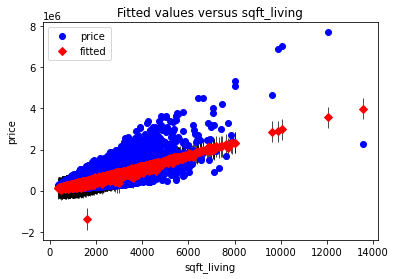

In [39]:
# fitted values vs. sqft_living
sm.graphics.plot_fit(second_results, "sqft_living")
plt.show()

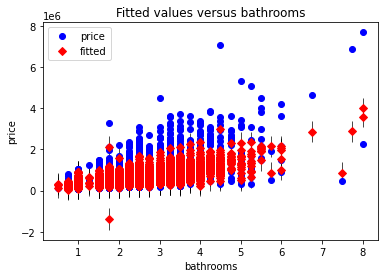

In [40]:
# fitted values vs. bathrooms
sm.graphics.plot_fit(second_results, "bathrooms")
plt.show()

#### Partial Regression Plot
Instead of a basic scatter plot with a best-fit line (since our model is now higher-dimensional), we'll use two partial regression plots, one for each of our predictors.

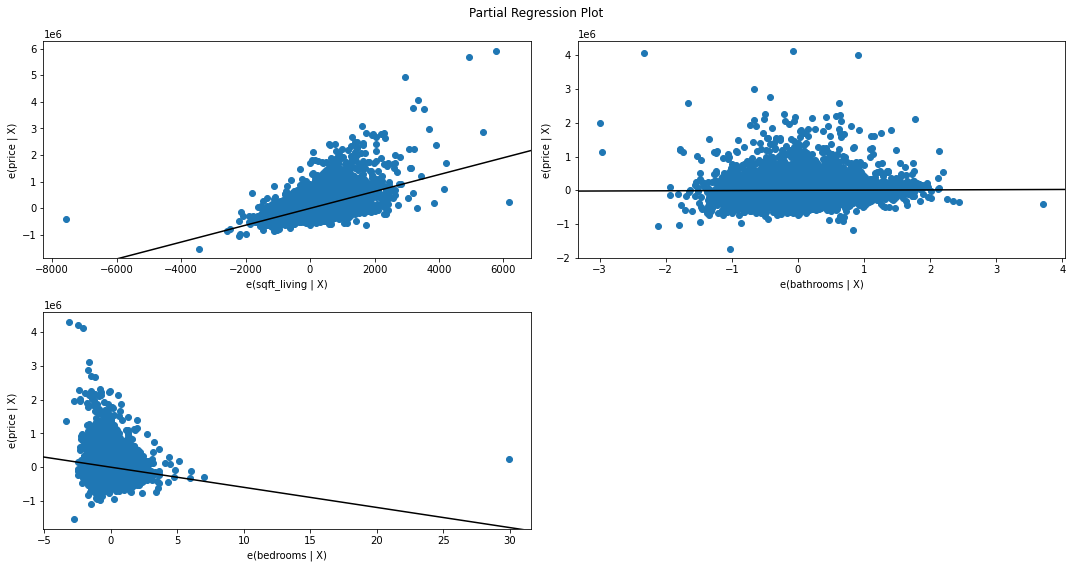

In [41]:
# partial regression plot
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["sqft_living", "bathrooms", "bedrooms"], fig=fig)
plt.tight_layout()
plt.show()

The partial regression plot for bathrooms and bedrooms is similarly showing the marginal contribution of bathrooms and bedrooms compared to a model with just sqft_living.

A reasonable conclusion to reach, looking at these plots, is that bathrooms and bedrooms is useful and should be included in the model.

In [42]:
# Angel added work on regression after this point

In [43]:
X_all = data.drop("price", axis=1).select_dtypes("number")
X_all

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,3,2.25,2570,7242,2.0,2170,98125,47.7210,-122.319,1690,7639
3,2487200875,4,3.00,1960,5000,1.0,1050,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,1680,98074,47.6168,-122.045,1800,7503
5,7237550310,4,4.50,5420,101930,1.0,3890,98053,47.6561,-122.005,4760,101930
6,1321400060,3,2.25,1715,6819,2.0,1715,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,3,2.50,1310,1294,2.0,1180,98116,47.5773,-122.409,1330,1265
21592,263000018,3,2.50,1530,1131,3.0,1530,98103,47.6993,-122.346,1530,1509
21593,6600060120,4,2.50,2310,5813,2.0,2310,98146,47.5107,-122.362,1830,7200
21594,1523300141,2,0.75,1020,1350,2.0,1020,98144,47.5944,-122.299,1020,2007


In [44]:
fourth_model = sm.OLS(y, sm.add_constant(X_all))
fourth_results = fourth_model.fit()

print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2027.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:28:30   Log-Likelihood:            -2.1719e+05
No. Observations:               15762   AIC:                         4.344e+05
Df Residuals:                   15749   BIC:                         4.345e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.237e+07   3.68e+06    -14.235

### How does the condition and nearest ammenities impact property values?

In [45]:
# replaces condition objects with numerics based on data dict.
condition_dict = {'Poor':1,'Fair':2,'Average':3,'Good':4,'Very Good':5}
data.condition.replace(to_replace=condition_dict,inplace=True)

# convert waterfront into numeric boolean
waterfront_bool_dict = {'YES':1,'NO':0,np.nan:0}
data.waterfront.replace(to_replace=waterfront_bool_dict,inplace=True)

# convert view from string into categorical ordinal
view_dict = {np.nan:0,'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
data.view.replace(to_replace=view_dict,inplace=True)

In [46]:
X_third = data[["condition", "waterfront", "view"]]
X_third

,condition,waterfront,view
1,3,0,0
3,5,0,0
4,3,0,0
5,3,0,0
6,3,0,0
...,...,...,...
21591,3,0,0
21592,3,0,0
21593,3,0,0
21594,3,0,0


In [47]:
third_model = sm.OLS(y, sm.add_constant(X_third))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     1097.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:28:30   Log-Likelihood:            -2.2305e+05
No. Observations:               15762   AIC:                         4.461e+05
Df Residuals:                   15758   BIC:                         4.461e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.668e+05   1.44e+04     32.489      0.0

#### How do location-related variables (e.g., ZIP code, proximity to amenities) impact property values?

In [48]:
selected_columns = data[['price', 'lat', 'long']]
selected_columns

,price,lat,long
1,538000.0,47.7210,-122.319
3,604000.0,47.5208,-122.393
4,510000.0,47.6168,-122.045
5,1230000.0,47.6561,-122.005
6,257500.0,47.3097,-122.327
...,...,...,...
21591,475000.0,47.5773,-122.409
21592,360000.0,47.6993,-122.346
21593,400000.0,47.5107,-122.362
21594,402101.0,47.5944,-122.299


In [49]:
selected_columns = selected_columns.sort_values(by='price', ascending=False)
selected_columns

,price,lat,long
7245,7700000.0,47.6298,-122.323
3910,7060000.0,47.6500,-122.214
9245,6890000.0,47.6305,-122.240
1446,5350000.0,47.6232,-122.220
1162,5110000.0,47.6767,-122.211
...,...,...,...
16700,85000.0,47.3897,-122.236
3763,84000.0,47.4752,-122.271
18453,83000.0,47.4727,-122.270
2139,82500.0,47.4799,-122.296


#### When is the best time to buy, hold, or sell properties in different neighborhoods?

In [50]:
data["date"].value_counts()

2014-06-25    103
2014-06-23    102
2015-04-28     93
2014-07-08     93
2014-07-14     93
             ... 
2014-07-04      1
2015-05-24      1
2014-11-15      1
2014-08-03      1
2015-03-08      1
Name: date, Length: 369, dtype: int64

<ipython-input-51-e8aedc9542bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_100_homes['year'] = first_100_homes['date'].dt.year


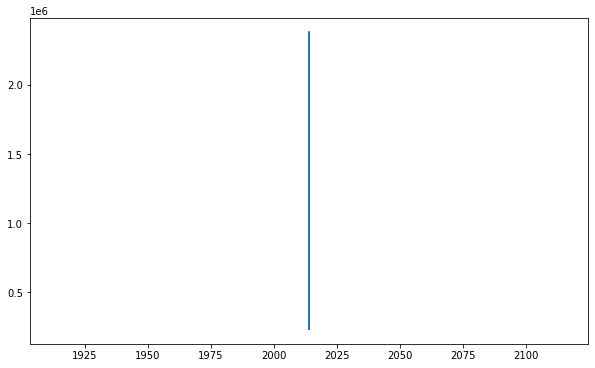

In [51]:
# Sort the data by the 'date' column in ascending order
data.sort_values(by='date', inplace=True)

# Extract the first 100 homes from the sorted dataset
first_100_homes = data.head(100)

# Extract the year from the 'date' column
first_100_homes['year'] = first_100_homes['date'].dt.year

# Create a histogram of sales for the first 100 homes
plt.figure(figsize=(10, 6))
plt.plot(first_100_homes['year'],first_100_homes['price'])
plt.show();

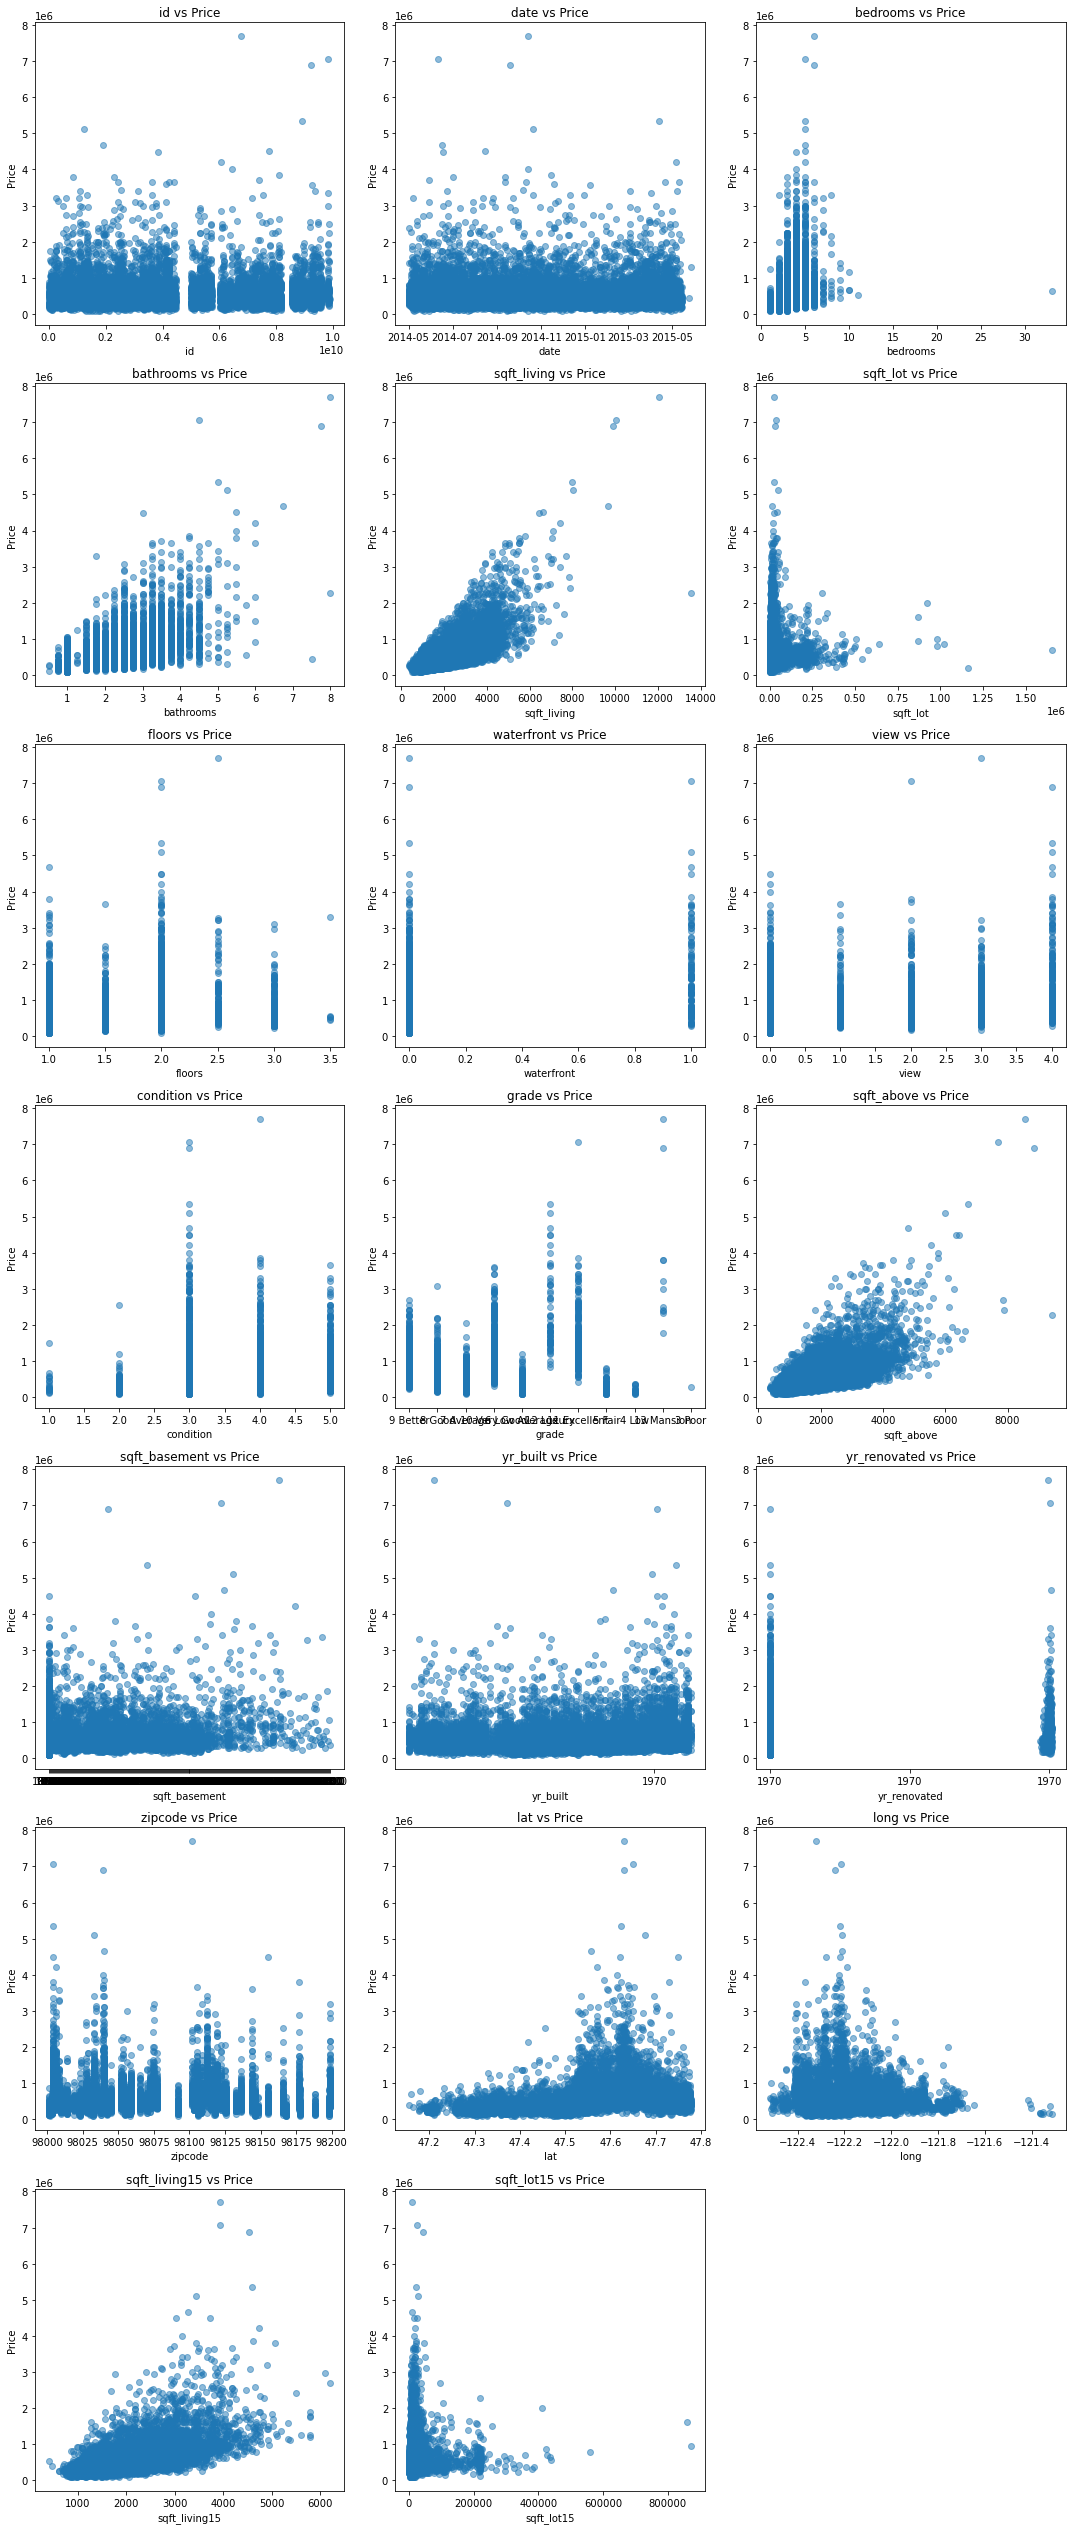

In [52]:
# Columns to analyze (excluding 'price' since we want to correlate it with other columns)
columns_to_correlate = data.columns.drop('price')

# Define the number of rows and columns for the grid
num_rows = len(columns_to_correlate)
num_cols = 3  

# Create subplots to display scatter plots in a grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Loop through each column and create scatter plots
for i, column in enumerate(columns_to_correlate):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.scatter(data[column], data['price'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    ax.set_title(f'{column} vs Price')

# Remove any empty subplots
for i in range(num_rows * num_cols):
    if i >= len(columns_to_correlate):
        fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

### When is the best time to buy, or sell a house 

In [53]:
# Create a new column with only the months
data['month'] = data['date'].dt.strftime('%B')

In [54]:
#Initialize an empty dictionary to store the counts
month_count_dict = {}

# Iterate through the month column and count occurences
for i in data['month']:
    if i in month_count_dict:
        month_count_dict[i] += 1
    else:
        month_count_dict[i] = 1

In [55]:
# This dictionary shows how many houses were sold in each month over the years
month_count_dict

{'May': 1782,
 'June': 1570,
 'July': 1637,
 'August': 1424,
 'September': 1293,
 'October': 1344,
 'November': 1051,
 'December': 1063,
 'January': 731,
 'February': 887,
 'March': 1348,
 'April': 1632}

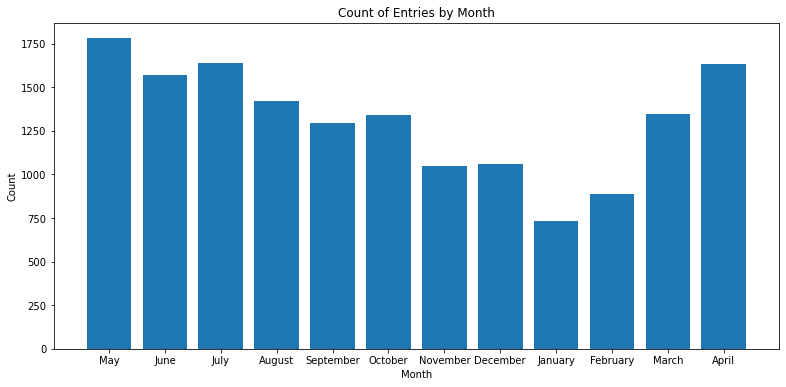

In [56]:
# Extract the months (keys) and their corresponding counts (values) from the dictionary
months = list(month_count_dict.keys())
counts = list(month_count_dict.values())

# Create a bar graph
plt.figure(figsize=(13, 6))
plt.bar(months, counts, tick_label=months)

# Customize the plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Entries by Month')

# Show the plot
plt.show()

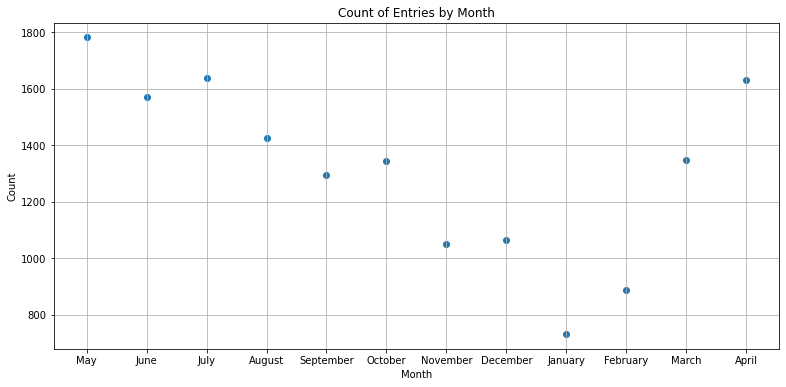

In [57]:
# Extract the months (keys) and their corresponding counts (values) from the dictionary
months = list(month_count_dict.keys())
counts = list(month_count_dict.values())

# Create a bar graph
plt.figure(figsize=(13, 6))
plt.scatter(months, counts)

# Customize the plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Entries by Month')

# add gridlines
plt.grid(True)
plt.xticks(months)

# Show the plot
plt.show()

In [58]:
# This bar graph shows that most of the houses were sold in the middle of the year over the years with 
# May having the highest number of houses sold
# The best time to buy, sell or hold properties is in the middle of the year, months from April to July

### Folium Map

In [59]:
import folium
from folium.plugins import MarkerCluster

# Create a Folium map
m = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=10)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for index, row in data.iterrows():
    popup_text = f"Location: {row['zipcode']}<br>Price: ${row['price']: .2f}"
    folium.Marker([row['lat'], row['long']], popup=popup_text).add_to(marker_cluster)

# Display the map
m.save('map.html')

#### Can we analyze historical data to identify cyclical patterns in the King County real estate market?

In [60]:
data["yr_built"] = data["yr_built"].astype("int64")
data["yr_built"]

11879    2014
11565    1966
12484    1944
9587     1951
16302    1968
         ... 
11548    1994
12623    1985
5632     1960
13040    1941
16580    1924
Name: yr_built, Length: 15762, dtype: int64

In [61]:
data['year'] = data['date'].dt.year
data['year']

11879    2014
11565    2014
12484    2014
9587     2014
16302    2014
         ... 
11548    2015
12623    2015
5632     2015
13040    2015
16580    2015
Name: year, Length: 15762, dtype: int64

In [62]:
house_age = data[['year', 'yr_built', 'price']]
house_age

,year,yr_built,price
11879,2014,2014,625000.0
11565,2014,1966,440000.0
12484,2014,1944,440000.0
9587,2014,1951,790000.0
16302,2014,1968,315000.0
...,...,...,...
11548,2015,1994,360000.0
12623,2015,1985,335000.0
5632,2015,1960,450000.0
13040,2015,1941,445500.0


In [63]:
data["age"] = data["year"] - data["yr_built"]
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,age
11879,7305300695,2014-05-02,625000.0,4,2.50,2820,8408,2.0,0,0,...,2014,1970-01-01,98155,47.7538,-122.325,1300,8408,May,2014,0
11565,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,1966,1970-01-01,98006,47.5443,-122.177,1850,9000,May,2014,48
12484,1982201345,2014-05-02,440000.0,2,1.00,800,4850,1.0,0,0,...,1944,1970-01-01,98107,47.6639,-122.364,1150,4365,May,2014,70
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,1951,1970-01-01,98117,47.6833,-122.400,2380,4750,May,2014,63
16302,1771000430,2014-05-02,315000.0,3,1.00,1160,9180,1.0,0,0,...,1968,1970-01-01,98077,47.7427,-122.072,1160,10282,May,2014,46


In [64]:
X_age = data[["age"]]
y_age = data["price"]

In [65]:
age_model = sm.OLS(y_age, sm.add_constant(X_age))
age_results = age_model.fit()

print(age_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     38.37
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           6.01e-10
Time:                        20:29:02   Log-Likelihood:            -2.2453e+05
No. Observations:               15762   AIC:                         4.491e+05
Df Residuals:                   15760   BIC:                         4.491e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.683e+05   5271.912    107.804      0.0

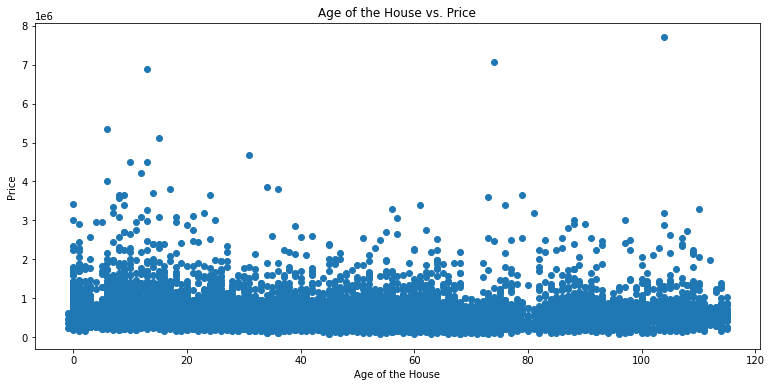

In [66]:
# Create a bar graph
plt.figure(figsize=(13, 6))
plt.scatter(data["age"], data["price"])

# Customize the plot labels and title
plt.xlabel('Age of the House')
plt.ylabel('Price')
plt.title('Age of the House vs. Price')

plt.show()